# Importing libraries

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

# Loading .xls

In [158]:
who = pd.read_csv('who')

In [159]:
who.columns

Index(['Unnamed: 0', 'country', 'status', 'life expectancy', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'polio', 'total expenditure', 'hiv/aids', 'thinness 1-19 years',
       'income composition of resources', 'schooling'],
      dtype='object')

In [160]:
who.drop(['Unnamed: 0'], axis=1, inplace=True)

# Dividing categoricals/numericals

In [161]:
who_categoricals = who['country']

In [162]:
type(who_categoricals)

pandas.core.series.Series

In [163]:
who_numericals = who._get_numeric_data()

In [164]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           192 non-null    float64
 1   life expectancy                  192 non-null    float64
 2   infant deaths                    192 non-null    float64
 3   alcohol                          192 non-null    float64
 4   percentage expenditure           192 non-null    float64
 5   hepatitis b                      192 non-null    float64
 6   measles                          192 non-null    float64
 7   bmi                              192 non-null    float64
 8   polio                            192 non-null    float64
 9   total expenditure                192 non-null    float64
 10  hiv/aids                         192 non-null    float64
 11  thinness 1-19 years              192 non-null    float64
 12  income composition of 

# Defining X1, y1 (Linear regression, w/o Hot Coding)

In [165]:
X1 = who_numericals

In [166]:
X1 = X1.drop(['life expectancy'], axis=1)

In [167]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           192 non-null    float64
 1   infant deaths                    192 non-null    float64
 2   alcohol                          192 non-null    float64
 3   percentage expenditure           192 non-null    float64
 4   hepatitis b                      192 non-null    float64
 5   measles                          192 non-null    float64
 6   bmi                              192 non-null    float64
 7   polio                            192 non-null    float64
 8   total expenditure                192 non-null    float64
 9   hiv/aids                         192 non-null    float64
 10  thinness 1-19 years              192 non-null    float64
 11  income composition of resources  192 non-null    float64
 12  schooling             

In [168]:
y1 = who_numericals['life expectancy']

In [169]:
y1

0      58.19375
1      75.15625
2      73.61875
3      49.01875
4      75.05625
         ...   
187    73.38750
188    74.77500
189    63.86250
190    53.90625
191    50.48750
Name: life expectancy, Length: 192, dtype: float64

# Data splitting X1, y1

In [170]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X1.columns)

# Standardizing Data X1, y1

array([[<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>],
       [<AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'polio'}>],
       [<AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>],
       [<AxesSubplot:title={'center':'schooling'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

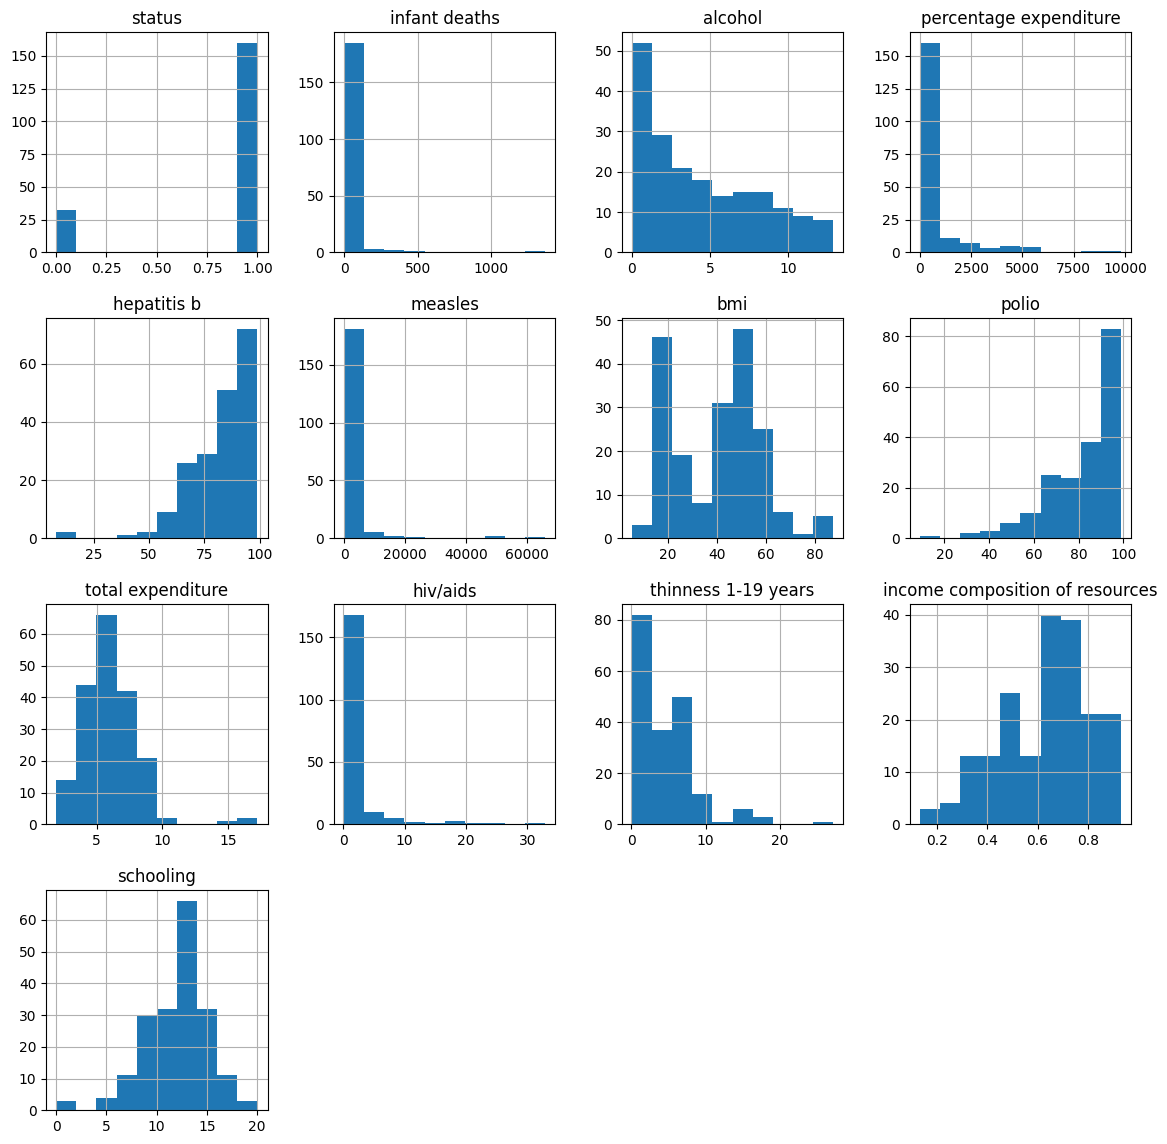

In [171]:
 X1.hist(figsize=(14,14))

In [172]:
std_scaler=StandardScaler().fit(X1_train)   

X1_train_scaled=std_scaler.transform(X1_train)



In [173]:
X1_test_scaled=std_scaler.transform(X1_test)

# Fitting model (Linear Regression, X1, y1)



In [174]:
model1=LinearRegression()    
model1.fit(X1_train_scaled, y1_train)

LinearRegression()

# Feature importance (Linear Regression, X1, y1, w/o Hot Coding)


In [175]:
feature_names1 = X1_train.columns
feature_names1 = list(feature_names1)

In [188]:
df6 = pd.DataFrame(list(zip(feature_names1, abs(model1.coef_))))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,3.302840
7,polio,2.769611
11,income composition of resources,2.615962
6,bmi,1.664782
4,hepatitis b,1.117014
12,schooling,1.009324
3,percentage expenditure,0.936234
0,status,0.711110
8,total expenditure,0.481385
2,alcohol,0.369812


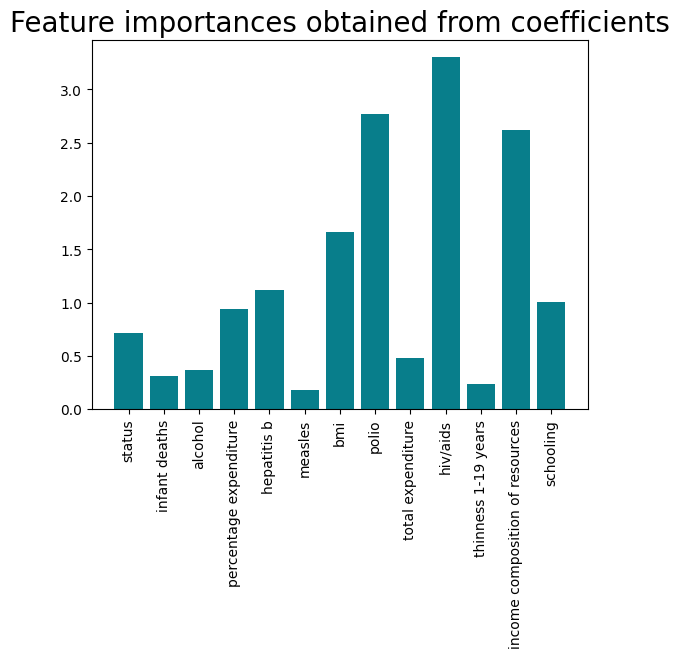

In [189]:
plt.bar(x=df6['columns_name'], height=df6['score_feature_importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Making prediction (X1, y1)

In [178]:
y1_pred=model1.predict(X1_test_scaled)   

y1_pred_train=model1.predict(X1_train_scaled)

# Evaluating model performance (X1, y1)

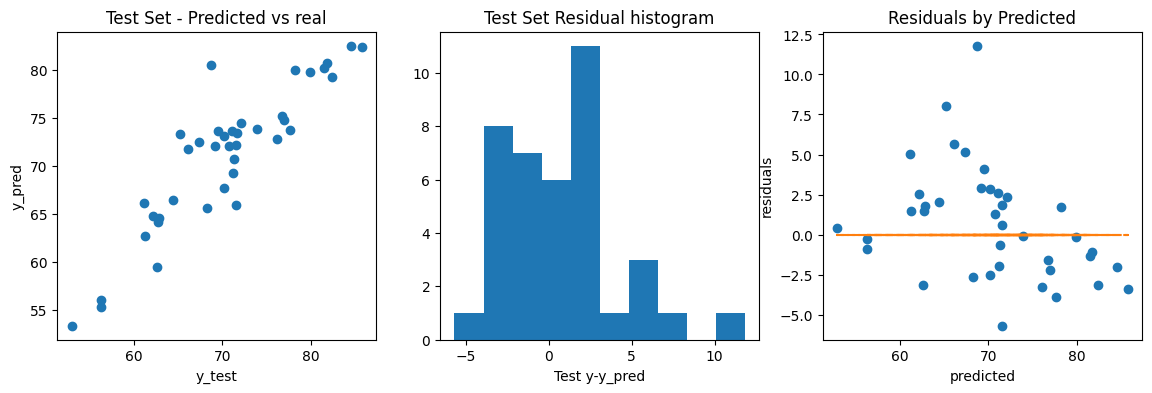

In [179]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y1_pred, y1_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y1_test - y1_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y1_pred,y1_test - y1_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

# Error metrics (X1, y1)

In [180]:
print(mse(y1_test,y1_pred))
print(mae(y1_test,y1_pred))

12.369063205026105
2.7112650370694182


In [181]:
R2_1=r2_score(y1_test,y1_pred)
R2_1

0.7671156394917041

# Cross validation (X1, y1)

In [182]:
scores1=cross_val_score(model1, X1_train_scaled, y1_train, cv = 5)
scores1

array([0.87961097, 0.78521754, 0.783813  , 0.70549627, 0.85421262])

In [183]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.80 accuracy with a standard deviation of 0.06


# Hot Coding coding categoricals

In [184]:
#who_categoricals['status'].unique()

KeyError: 'status'

In [ ]:
#len(who_categoricals['status'].unique())

In [ ]:
#hc_who_categoricals = pd.get_dummies(who_categoricals[['status']], drop_first=True)
#hc_who_categoricals.info()

In [ ]:
#hc_who_categoricals['status_Developing'].unique()

# Defining X2, y2 (Linear regression, w/ Hot Coding)

In [ ]:
X2 = who_numericals

In [ ]:
X2

In [ ]:
X2 = pd.concat([X2, hc_who_categoricals], axis=1)

In [ ]:
X2.columns

In [ ]:
X2.drop(['life expectancy'], axis=1, inplace=True) 

In [ ]:
X2

In [ ]:
y2 = who['life expectancy']

# Data splitting (X2, y2)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test, columns=X2.columns)

# Standardizing Data (X2, y2)

In [ ]:
std_scaler=StandardScaler().fit(X2_train)   

X2_train_scaled=std_scaler.transform(X2_train)



In [ ]:
X2_test_scaled=std_scaler.transform(X2_test)

# Fitting model (Linear Regression X2, y2, w/ Hot Coding)



In [ ]:
model2=LinearRegression()    
model2.fit(X2_train_scaled, y2_train)

# Feature importance (Linear Regression, X2, y2, w/ Hot Coding)


In [ ]:
feature_names2 = X2_train.columns
feature_names2 = list(feature_names2)

In [ ]:
df2 = pd.DataFrame(list(zip(feature_names2, model2.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

# Making prediction (X2, y2)

In [ ]:
y2_pred=model2.predict(X2_test_scaled)   

y2_pred_train=model2.predict(X2_train_scaled)

# Evaluating model performance (X2, y2)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y2_pred, y2_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y2_test - y2_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y2_pred,y2_test - y2_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X2, y2)

In [ ]:
print(mse(y2_test,y2_pred))
print(mae(y2_test,y2_pred))

In [ ]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

# Cross validation (X2, y2)

In [ ]:
scores2=cross_val_score(model2, X2_train_scaled, y2_train, cv = 5)
scores2

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

# Defining X3, y3 (RFE)

In [ ]:
X3 = X2

In [ ]:
y3 = y2

# Data splitting (X3, y3)

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

X3_train = pd.DataFrame(X3_train, columns=X3.columns)
X3_test  = pd.DataFrame(X3_test, columns=X3.columns)

# Recursive Feature Elimination (X3, y3)

In [ ]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X3_train, y3_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X3_train.iloc[:,kept_features].columns)

X3_train_RFE = selector.transform(X3_train)
X3_test_RFE  = selector.transform(X3_test)

X3_train_RFE = pd.DataFrame(X3_train_RFE, columns=kept_features)
X3_test_RFE  = pd.DataFrame(X3_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X3_train_RFE)

# Standardizing Data (X3, y3)

In [ ]:
std_scaler=StandardScaler().fit(X3_train_RFE)   

X3_train_scaled=std_scaler.transform(X3_train_RFE)


In [ ]:
X3_test_scaled=std_scaler.transform(X3_test_RFE)

# Fitting model (Linear Regression, X3, y3, RFE)

In [ ]:
model3=LinearRegression()    
model3.fit(X3_train_scaled, y3_train)

# Feature importance (Linear Regression, X3, y3, RFE)


In [ ]:
feature_names3 = X3_train.columns
feature_names3 = list(feature_names3)

In [ ]:
df2 = pd.DataFrame(list(zip(feature_names3, model3.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

# Making prediction (X3, y3)

In [ ]:
y3_pred=model3.predict(X3_test_scaled)   

y3_pred_train=model2.predict(X3_train_scaled)

# Evaluating model performance (X3, y3)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y3_pred, y3_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y3_test - y3_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y3_pred,y3_test - y3_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y3_pred,np.zeros(len(y3_pred)),linestyle='dashed')

# Error metrics (X3, y3)

In [ ]:
print(mse(y3_test,y3_pred))
print(mae(y3_test,y3_pred))

In [ ]:
R2_3=r2_score(y3_test,y3_pred)
R2_3

# Cross validation (X3, y3)

In [ ]:
scores3=cross_val_score(model3, X3_train, y3_train, cv = 5)
scores3

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

# Defining X4, y4 (KNN Regression)

In [ ]:
X4 = X3

In [ ]:
y4 = y3

# Data splitting (X4, y4)

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

X4_train = pd.DataFrame(X4_train, columns=X4.columns)
X4_test  = pd.DataFrame(X4_test, columns=X4.columns)

# Recursive Feature Elimination (X3, y3)

In [ ]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X4_train, y4_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X4_train.iloc[:,kept_features].columns)

X4_train_RFE = selector.transform(X4_train)
X4_test_RFE  = selector.transform(X4_test)

X4_train_RFE = pd.DataFrame(X4_train_RFE, columns=kept_features)
X4_test_RFE  = pd.DataFrame(X4_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X4_train_RFE)

# Power transforming data (X4, y4)

In [ ]:
trans = PowerTransformer()
trans.fit(X4_train)

In [ ]:
X4_train_scaled = trans.transform(X4_train)
X4_test_scaled  = trans.transform(X4_test)

# Fitting model (KNN Regression, X4, y4)

In [ ]:
model4 = KNeighborsRegressor(n_neighbors=2)

In [ ]:
model4.fit(X4_train_scaled, y4_train)

# Making prediction (X4, y4)

In [ ]:
y4_pred_train = model4.predict(X4_train_scaled)
y4_pred  = model4.predict(X4_test_scaled)

# Evaluating model performance (X4, y4)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y4_pred, y4_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y4_test - y4_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y4_pred,y4_test - y4_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y4_pred,np.zeros(len(y4_pred)),linestyle='dashed')

# Error metrics (X4, y4)

In [ ]:
print(mse(y4_test,y4_pred))
print(mae(y4_test,y4_pred))

In [ ]:
R2_4=r2_score(y4_test,y4_pred)
R2_4

# Cross validation (X4, y4)

In [ ]:
scores4=cross_val_score(model4, X4_train_scaled, y4_train, cv = 5)
scores4

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))

# Defining X5, y5 (Decision Tress Regression)

In [ ]:
X5 = X4

In [ ]:
y5 = y4

# Data splitting (X5, y5)

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.20, random_state=42)

X5_train = pd.DataFrame(X5_train, columns=X5.columns)
X5_test  = pd.DataFrame(X5_test, columns=X5.columns)

# Standardizing Data (X5, y5)

- Not needed because using decision tree

# Fitting model (Decision Tree Regression, X5, y5)

In [ ]:
model5 = DecisionTreeRegressor(max_depth=3)

model5.fit(X5_train, y5_train)



# Making prediction (X5, y5)

In [ ]:
y5_pred_train = model5.predict(X5_train)
y5_pred  = model5.predict(X5_test)

# Evaluating model performance (X5, y5)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y5_pred, y5_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y5_test - y5_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y5_pred,y5_test - y5_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y5_pred,np.zeros(len(y5_pred)),linestyle='dashed')

# Error metrics (X5, y5)

In [ ]:
print(mse(y5_test,y5_pred))
print(mae(y5_test,y5_pred))

In [ ]:
R2_5=r2_score(y4_test,y4_pred)
R2_5

# Cross validation (X5, y5)

In [ ]:
scores5=cross_val_score(model5, X5_train, y5_train, cv = 5)
scores5

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

# Defining X6, y6 (Random Forest Regression)

In [ ]:
X6 = X5

In [ ]:
y6 = y5

# Data splitting (X6, y6)

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=42)

X6_train = pd.DataFrame(X6_train, columns=X5.columns)
X6_test  = pd.DataFrame(X6_test, columns=X5.columns)

# Standardizing Data (X6, y6)

- Not needed because using decision tree

# Fitting model (Random Forest Regression, X6, y6)

In [ ]:
model6 = RandomForestRegressor(n_estimators=100)

model6.fit(X6_train, y6_train)



# Feature importance (Random Forest Regression, X6, y6)


In [ ]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)

In [ ]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

# Making prediction (X6, y6)

In [ ]:
y6_pred_train = model6.predict(X6_train)
y6_pred  = model6.predict(X6_test)

# Evaluating model performance (X6, y6)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y6_pred, y6_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y6_test - y6_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y6_pred,y6_test - y6_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y6_pred,np.zeros(len(y6_pred)),linestyle='dashed')

# Error metrics (X6, y6)

In [ ]:
print(mse(y6_test,y6_pred))
print(mae(y6_test,y6_pred))

In [ ]:
R2_6=r2_score(y6_test,y6_pred)
R2_6

# Cross validation (X6, y6)

In [ ]:
scores6=cross_val_score(model6, X6_train, y6_train, cv = 10)
scores6

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores6.mean(), scores6.std()))

In [ ]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)


In [ ]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

# Defining X7, y7 (Random Forest Regression w/ Feature Selection X6, y6)

In [ ]:
X7 = X6[['hiv/aids','income composition of resources','adult mortality']].copy()

In [ ]:
X7.isna().any()

In [ ]:
y7 = y6

# Data splitting (X7, y7)

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.20, random_state=42)

X7_train = pd.DataFrame(X7_train, columns=X7.columns)
X7_test  = pd.DataFrame(X7_test, columns=X7.columns)

# Fitting model (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)

In [ ]:
model7 = RandomForestRegressor(n_estimators=100)

model7.fit(X7_train, y7_train)



# Feature importance (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)


- no need to do feature importance, only using three features from X6, y6

# Making prediction (X7, y7)

In [ ]:
y7_pred_train = model7.predict(X7_train)
y7_pred  = model7.predict(X7_test)

# Evaluating model performance (X7, y7)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y7_pred, y7_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y7_test - y7_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y7_pred,y7_test - y7_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y7_pred,np.zeros(len(y7_pred)),linestyle='dashed')

# Error metrics (X7, y7)

In [ ]:
print(mse(y7_test,y7_pred))
print(mae(y7_test,y7_pred))

In [ ]:
R2_7=r2_score(y7_test,y7_pred)
R2_7

# Cross validation (X7, y7)

In [ ]:
scores7=cross_val_score(model7, X7_train, y7_train, cv = 10)
scores7

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores7.mean(), scores7.std()))